In [ ]:
import pandas as pd
import numpy as np
import os

In [3]:
df_transaksi_belanja = pd.read_csv('./dataset_updated/5_4 transaksi berjalan pendapatan primer.csv')
df_uang_beredar = pd.read_csv('./dataset_updated/1_1 uang beredar.csv')
df_pendapatan_pemerintah = pd.read_csv('./dataset_updated/4_1 pendapatan_pemerintah.csv')
df_belanja_pemerintah = pd.read_csv('./dataset_updated/4_2 belanja_pemerintah.csv')
df_indeks_harga_konsumen = pd.read_csv('./dataset_updated/8_1 indeks harga konsumen.csv')
df_indeks_harga_perdagangan = pd.read_csv('./dataset_updated/8_2 indeks harga perdagangan.csv')

In [4]:
df_transaksi_belanja.head()

,Description,2014,2015,2016,2017,2018,2019,2020_Q1,2020_Q2,2020_Q3,...,2022_Q3,2022_Q4,2022,2023_Q1,2023_Q2,2023_Q3,2023_Q4,2023,2024_Q1,2024_Q2
0,Pendapatan Primer,-29703000000,-28379000000,-29647000000,-32131000000,-30815000000,-33775000000,-7936000000,-6185000000,-7427000000,...,-8931000000,-9634000000,-35303000000,-8860000000,-9304000000,-8640000000,-8921000000,-35725000000,-8831000000,-9291000000
1,- Penerimaan,2130000000,2822000000,4048000000,5575000000,9302000000,7373000000,1035000000,1404000000,1251000000,...,1993000000,1982000000,7530000000,1792000000,1995000000,1950000000,2127000000,7864000000,2360000000,2302000000
2,- Pembayaran,-31832000000,-31201000000,-33695000000,-37706000000,-40117000000,-41147000000,-8971000000,-7589000000,-8678000000,...,-10924000000,-11616000000,-42833000000,-10652000000,-11299000000,-10591000000,-11048000000,-43589000000,-11190000000,-11593000000
3,A. Kompensansi tenaga kerja,-1200000000,-1361000000,-1553000000,-1507000000,-1503000000,-1480000000,-333000000,-256000000,-348000000,...,-384000000,-413000000,-1429000000,-367000000,-302000000,-405000000,-433000000,-1506000000,-387000000,-238000000
4,- Penerimaan,206000000,213000000,219000000,228000000,241000000,231000000,65000000,55000000,47000000,...,50000000,62000000,244000000,70000000,65000000,51000000,64000000,249000000,72000000,147000000


In [5]:
df_uang_beredar.head()

,Description,2014,2015,2016,2017,2018,2019,2020_Jan,2020_Feb,2020_Mar,...,2023_Nov,2023_Dec,2024_Jan,2024_Feb,2024_Mar,2024_Apr,2024_May,2024_Jun,2024_Jul,2024_Aug
0,Uang Beredar Luas(M2),4173327000000000,4548800000000000,5004977000000000,5419165000000000,5760046000000000,6136777000000000,6046651000000000,6116495000000000,6440457000000000,...,8574917000000000,8824748000000000,8721950000000000,8739574000000000,8891425000000000,8926466000000000,8968821000000000,9015355000000000,8983383000000000,8973696000000000
1,Uang Beredar Sempit (M1),942221000000000,1055440000000000,1237643000000000,1390807000000000,1457150000000000,1565439000000000,1484403000000000,1505491000000000,1648681000000000,...,2510768000000000,2675324000000000,2564734000000000,2556485000000000,2639425000000000,2623331000000000,2625271000000000,2692395000000000,2625264000000000,2626712000000000
2,Uang Kartal di Luar Bank Umum dan BPR,419262000000000,469534000000000,508124000000000,586576000000000,625370000000000,654764000000000,616129000000000,607961000000000,620353000000000,...,893165000000000,975919000000000,915931000000000,911689000000000,953824000000000,943292000000000,934144000000000,958575000000000,939541000000000,954380000000000
3,Giro Rupiah,522960000000000,804231000000000,729519000000000,585906000000000,831779000000000,910675000000000,868273000000000,897529000000000,1028328000000000,...,1617603000000000,1699406000000000,1648803000000000,1644796000000000,1685601000000000,1680039000000000,1691128000000000,1733820000000000,1685723000000000,1672331000000000
4,a.I: Uang Elektronik,0,0,0,2421000000000,4033000000000,6143000000000,0,0,0,...,11887000000000,11989000000000,12079000000000,12356000000000,12461000000000,12874000000000,12821000000000,13026000000000,12964000000000,13020000000000


In [6]:
df_pendapatan_pemerintah.head()

,Description,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Pendapatan Negara dan Hibah,1550491000000000,1508020000000000,1555934000000000,1666376000000000,1943675000000000,1960634000000000,1647783000000000,2011347000000000,2635843000000000,2783930000000000
1,Penerimaan Dalam Negeri,1545457000000000,1496047000000000,1546946000000000,1654746000000000,1928110000000000,1955136000000000,1628951000000000,2006334000000000,2630147000000000,2766746000000000
2,Penerimaan Perpajakan,1146866000000000,1240419000000000,1284970000000000,1343530000000000,1518790000000000,1546142000000000,1285136000000000,1547841000000000,2034552000000000,2154208000000000
3,Pajak Dalam Negeri,1103218000000000,1205479000000000,1249499000000000,1304316000000000,1472908000000000,1505088000000000,1248415000000000,1474146000000000,1943655000000000,2089718000000000
4,Pajak Penghasilan (PPh),546181000000000,602308000000000,666212000000000,646793000000000,749947000000000,772266000000000,594033000000000,704925000000000,998214000000000,1061234000000000


In [7]:
df_belanja_pemerintah.head()

,Description,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Belanja Negara,1777183000000000,1806515000000000,1864275000000000,2007352000000000,2213118000000000,2309287000000000,2595481000000000,2786411000000000,3.096263e+15,3.121217e+15
1,Belanja Pemerintah Pusat,1203577000000000,1183304000000000,1154018000000000,1265359000000000,1455325000000000,1496314000000000,1832951000000000,2000704000000000,2.280028e+15,2.239787e+15
2,Pengeluaran Rutin,0,0,0,0,0,0,0,0,0.000000e+00,0.000000e+00
3,Belanja Pegawai,243720000000000,281143000000000,305142000000000,312729000000000,346891000000000,376074000000000,380532000000000,387752000000000,4.024420e+14,4.127110e+14
4,Belanja Barang,176622000000000,233281000000000,259647000000000,291459000000000,347468000000000,334418000000000,422338000000000,530059000000000,4.261490e+14,4.327150e+14


In [8]:
df_indeks_harga_konsumen.head()

,Description,2020_Jan,2020_Feb,2020_Mar,2020_Apr,2020_May,2020_Jun,2020_Jul,2020_Aug,2020_Sep,...,2023_Dec,2024_Jan,2024_Feb,2024_Mar,2024_Apr,2024_May,2024_Jun,2024_Jul,2024_Aug,2024_Sep
0,"MAKANAN, MINUMAN DAN TEMBAKAU",106,107,107,107,107,107,106,106,105,...,125,109,110,111,111,111,110,109,109,108.0
1,PAKAIAN DAN ALAS KAKI,104,105,105,105,105,105,105,105,105,...,109,102,102,103,103,103,103,103,103,103.0
2,"PERUMAHAN, AIR, LISTRIK, DAN BAHAN BAKAR RUMAH...",103,103,103,103,103,103,103,103,103,...,108,102,102,102,102,102,102,102,102,102.0
3,"PERLENGKAPAN, PERALATAN DAN PEMELIHARAAN RUTIN...",105,105,105,105,105,105,105,106,106,...,116,103,103,103,103,103,103,104,104,104.0
4,KESEHATAN,105,106,106,106,106,107,107,107,107,...,115,103,103,104,104,104,104,104,104,104.0


In [9]:
df_indeks_harga_perdagangan.head()

,Description,2020_Jan,2020_Feb,2020_Mar,2020_Apr,2020_May,2020_Jun,2020_Jul,2020_Aug,2020_Sep,...,2023_Dec,2024_Jan,2024_Feb,2024_Mar,2024_Apr,2024_May,2024_Jun,2024_Jul,2024_Aug,2024_Sep
0,Pertanian,101.61,102.21,101.81,101.08,100.12,100.34,99.96,98.84,98.51,...,112.69,113.16,114.64,116.72,117.05,116.95,116.79,114.78,113.46,111.75
1,Pertambangan dan Penggalian,99.17,99.16,99.81,100.72,99.99,100.05,100.53,101.06,100.91,...,124.07,125.19,125.36,126.06,126.38,127.54,126.64,126.52,125.31,125.70
2,Industri,103.43,103.59,103.81,104.08,104.20,104.35,104.33,104.51,104.57,...,118.56,118.78,119.50,120.00,120.21,120.17,120.25,120.44,120.59,120.74
3,IHPB Nasional,103.04,103.29,103.39,103.47,103.37,103.54,103.45,103.38,103.36,...,117.46,117.74,118.60,119.41,119.64,119.60,119.63,119.39,119.24,119.03
4,Impor,150.91,154.02,153.81,152.91,145.77,145.62,146.44,149.65,150.85,...,175.18,174.10,176.42,180.58,183.46,179.08,179.17,176.56,172.35,NaN


In [10]:
def transform_to_long_format(file_path):
    # Read the CSV file
    df = pd.read_csv(file_path)
    
    # Transform data to long format using pd.melt
    data_long = pd.melt(
        df,
        id_vars=['Description'],
        var_name='Date',
        value_name='Value'
    )
    
    # Convert 'Date' column to datetime format
    data_long['Date'] = pd.to_datetime(data_long['Date'], errors='coerce', format='%Y_%b')
    data_long.dropna(subset=['Date'], inplace=True)
    
    # Sort data by 'Description' and 'Date'
    data_long.sort_values(by=['Description', 'Date'], inplace=True)
    
    # Reset index for a cleaner look
    data_long.reset_index(drop=True, inplace=True)
    
    return data_long

extracted_folder = 'dataset_updated/'
extracted_files = os.listdir(extracted_folder)
# Apply the transformation to all files and store the results
transformed_data = {}
for file_name in extracted_files:
    file_path = os.path.join(extracted_folder, file_name)
    transformed_data[file_name] = transform_to_long_format(file_path)

# Display the transformed data for one of the files as an example
# import ace_tools as tools; tools.display_dataframe_to_user(name="Transformed Data (Long Format) - Example", dataframe=transformed_data['1_1 uang beredar.csv'])
transformed_data

{'1_1 uang beredar.csv':                      Description       Date             Value
 0     Aktiva Dalam Negeri Bersih 2020-01-01  4522002000000000
 1     Aktiva Dalam Negeri Bersih 2020-02-01  4523106000000000
 2     Aktiva Dalam Negeri Bersih 2020-03-01  4769481000000000
 3     Aktiva Dalam Negeri Bersih 2020-04-01  4592069000000000
 4     Aktiva Dalam Negeri Bersih 2020-05-01  4808802000000000
 ...                          ...        ...               ...
 1787        a.I: Uang Elektronik 2024-04-01    12874000000000
 1788        a.I: Uang Elektronik 2024-05-01    12821000000000
 1789        a.I: Uang Elektronik 2024-06-01    13026000000000
 1790        a.I: Uang Elektronik 2024-07-01    12964000000000
 1791        a.I: Uang Elektronik 2024-08-01    13020000000000
 
 [1792 rows x 3 columns],
 '4_1 pendapatan_pemerintah.csv': Empty DataFrame
 Columns: [Description, Date, Value]
 Index: [],
 '4_2 belanja_pemerintah.csv': Empty DataFrame
 Columns: [Description, Date, Value]
 Index: [

In [11]:
combined_data = pd.DataFrame()
output_folder = 'dataset_transformed/'
os.makedirs(output_folder, exist_ok=True)

for file_name, df_transformed in transformed_data.items():
    output_file_path = os.path.join(output_folder, file_name)
    df_transformed.to_csv(output_file_path, index=False)
    combined_data = pd.concat([combined_data, df_transformed],ignore_index=True)

combined_file_path = 'combined_dataset.csv'
combined_data.to_csv(combined_file_path, index=False)

In [12]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
combined_data['Value'] = scaler.fit_transform(combined_data[['Value']])

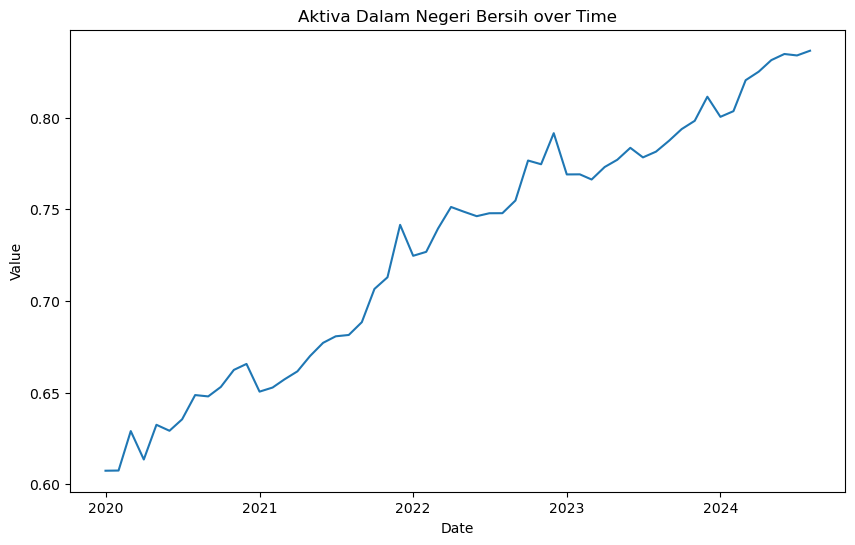

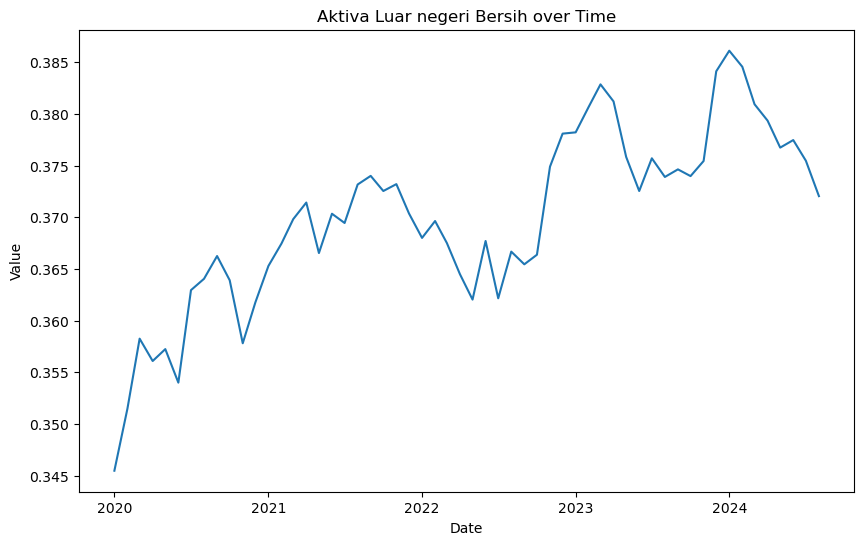

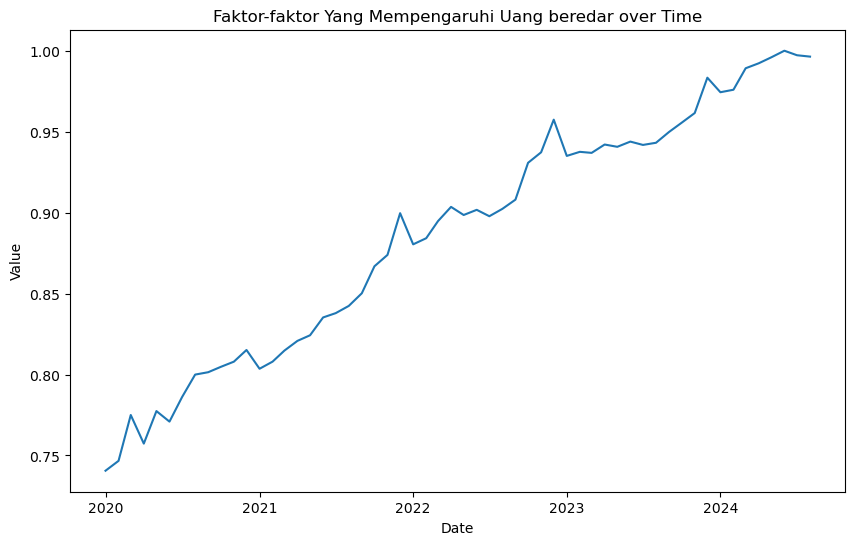

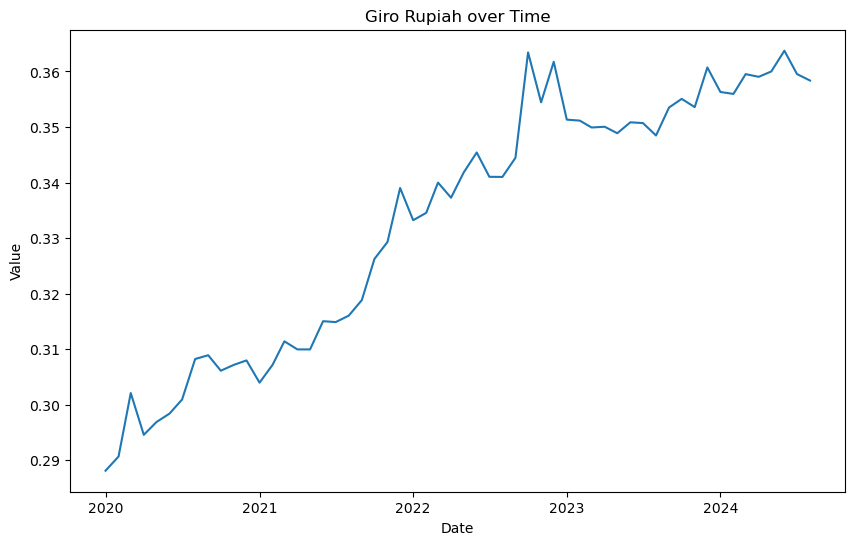

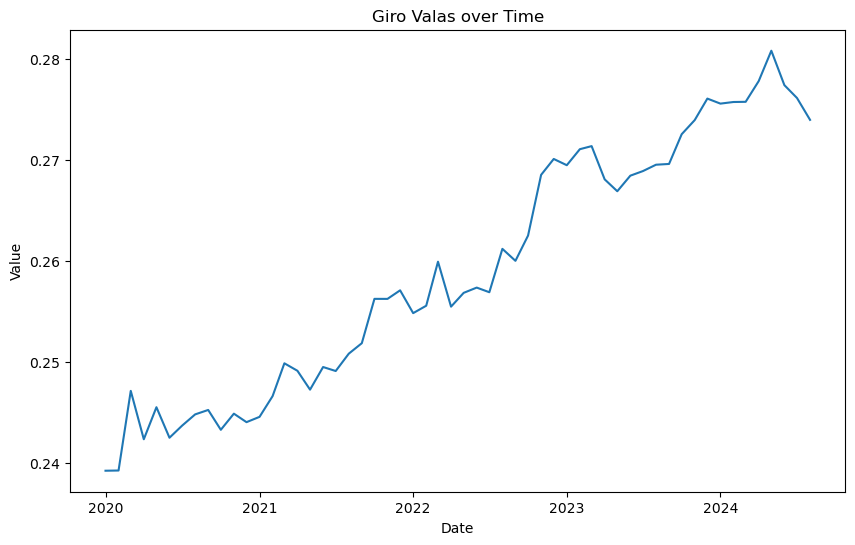

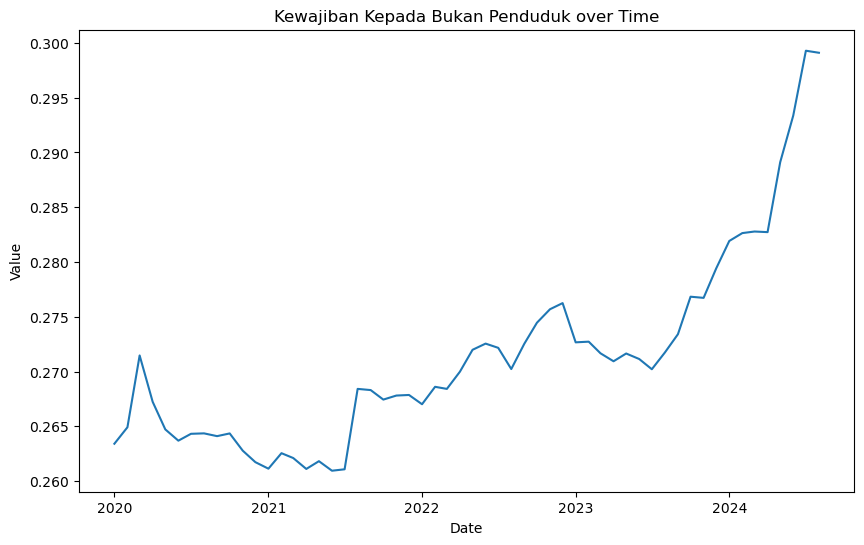

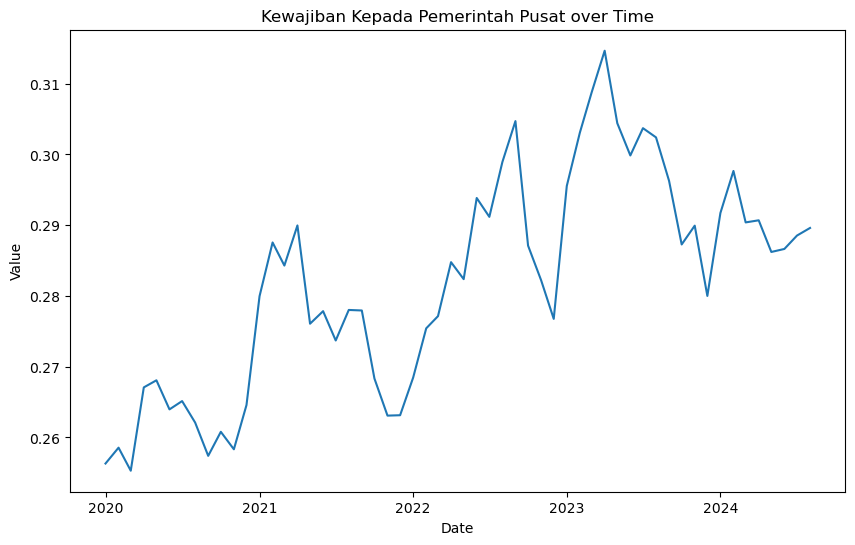

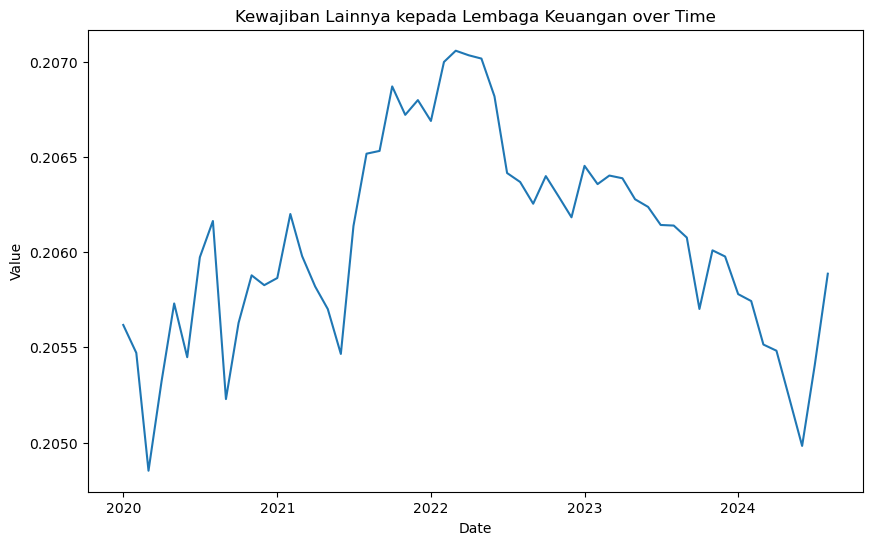

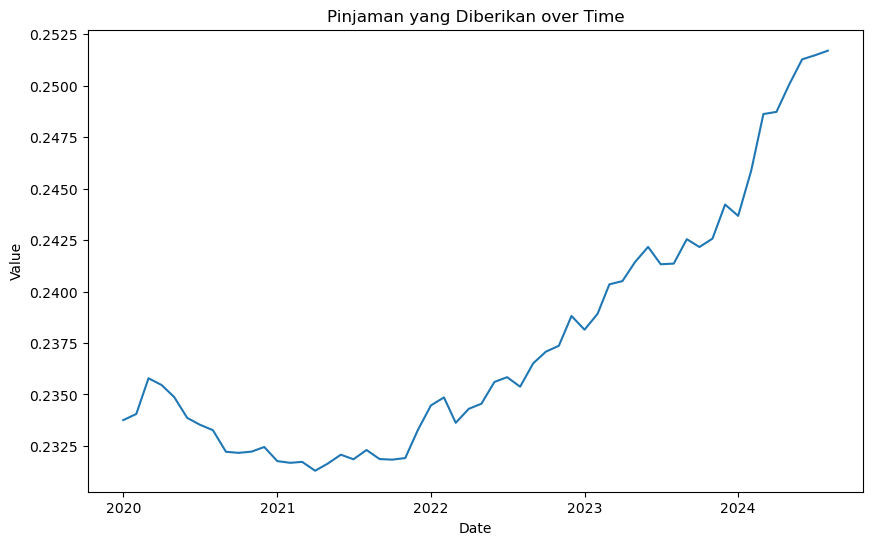

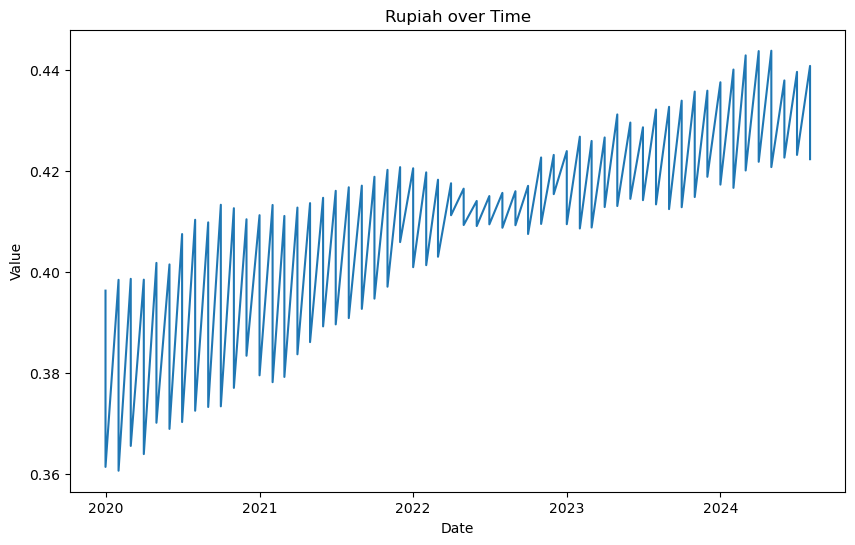

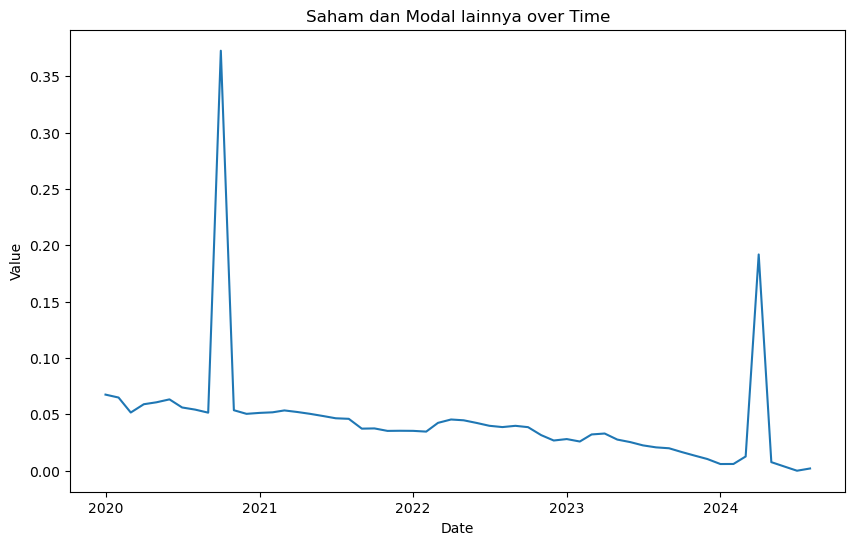

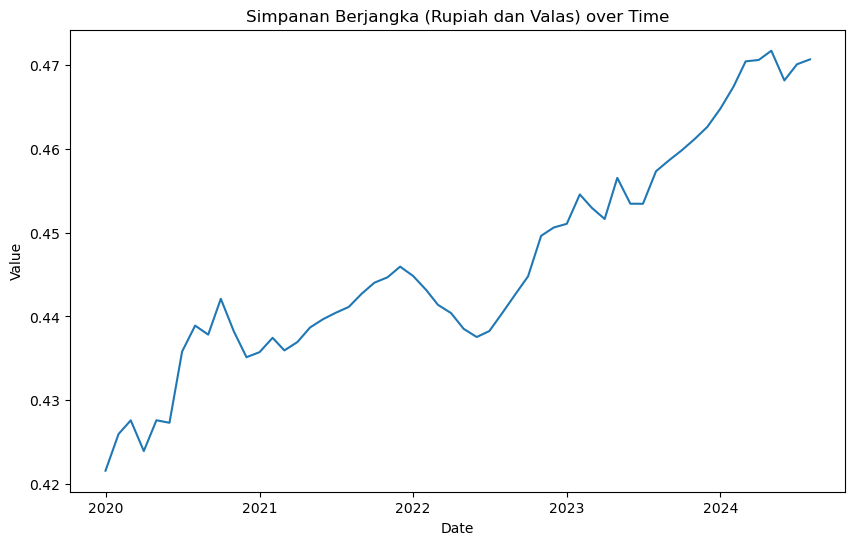

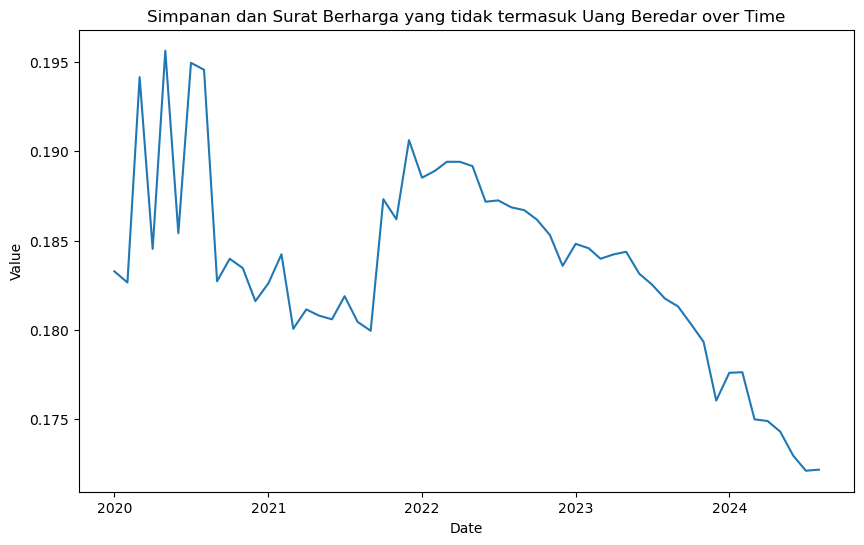

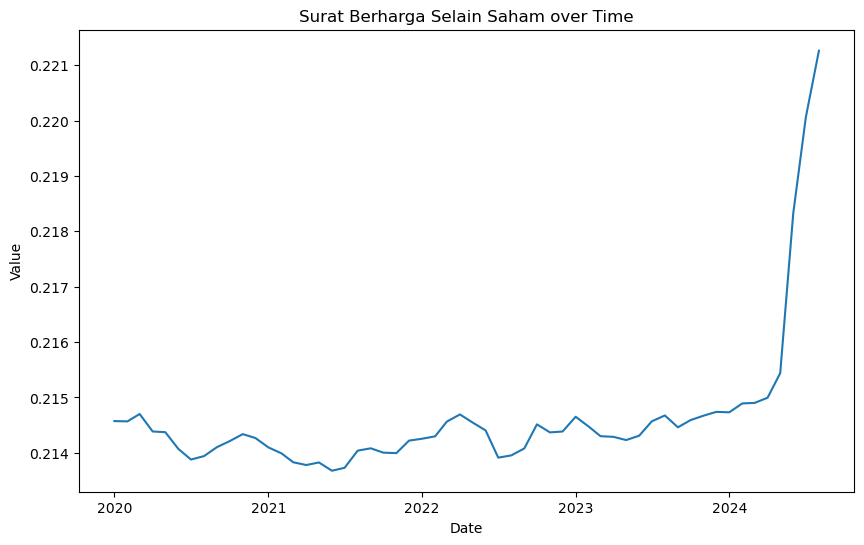

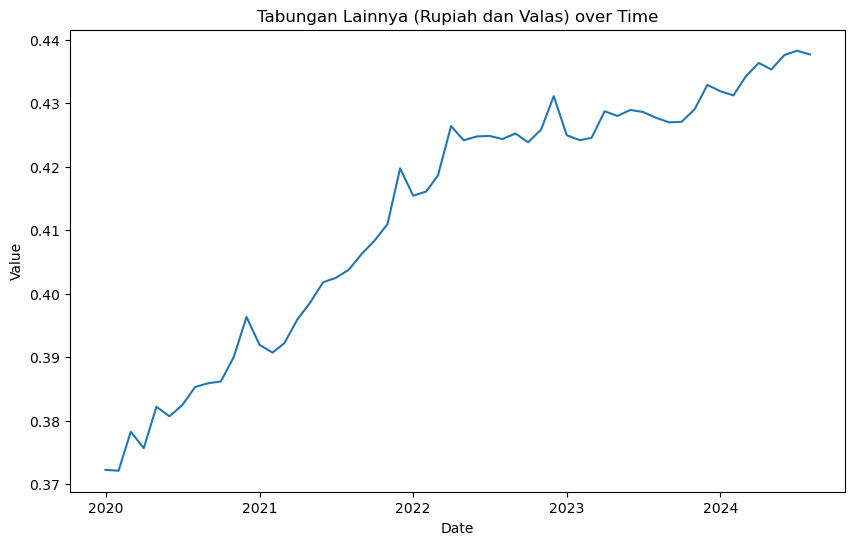

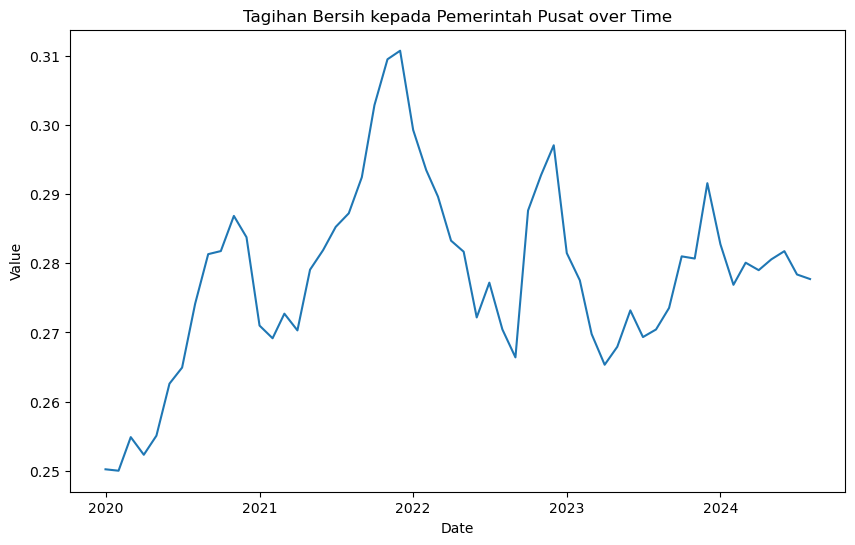

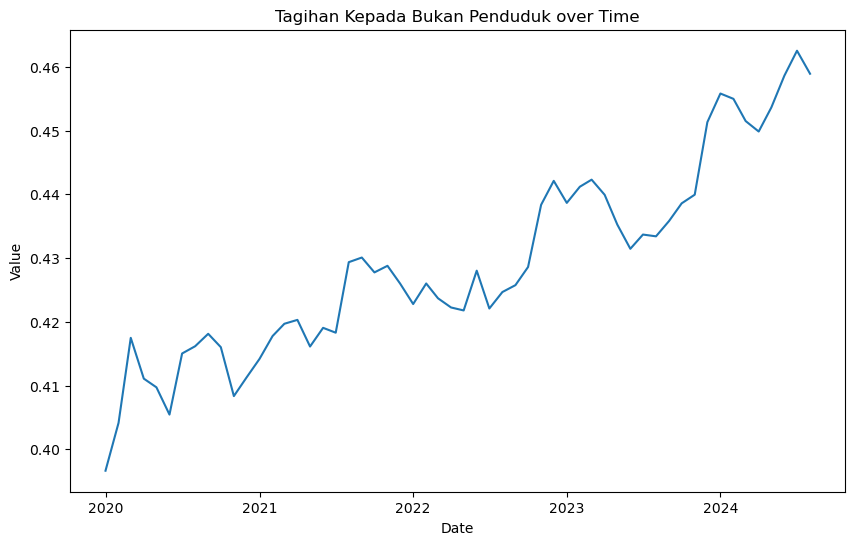

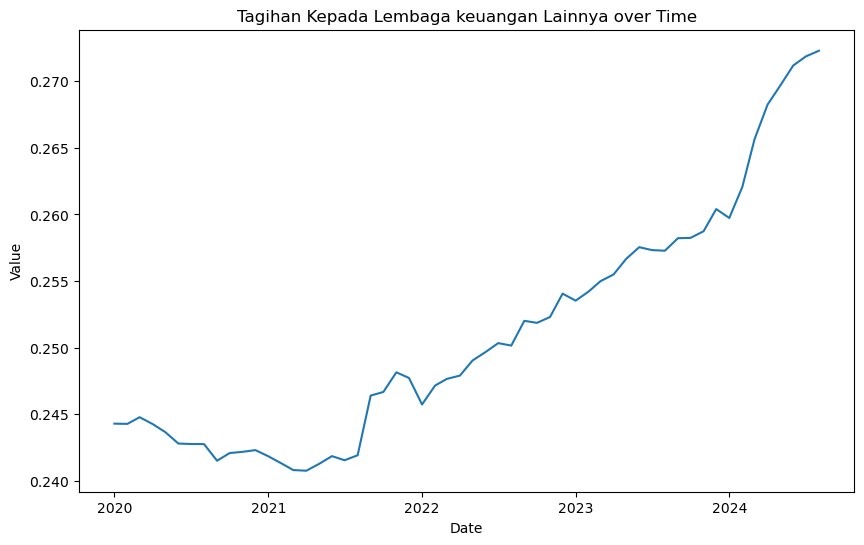

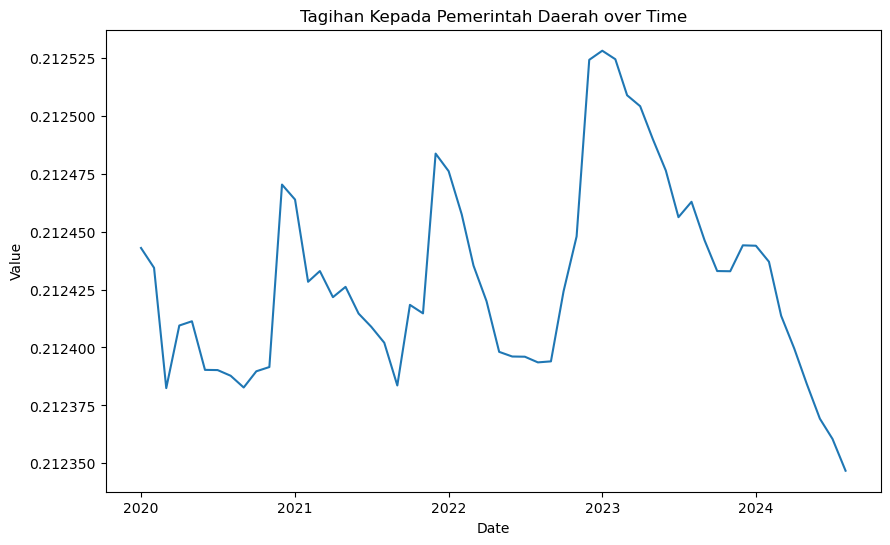

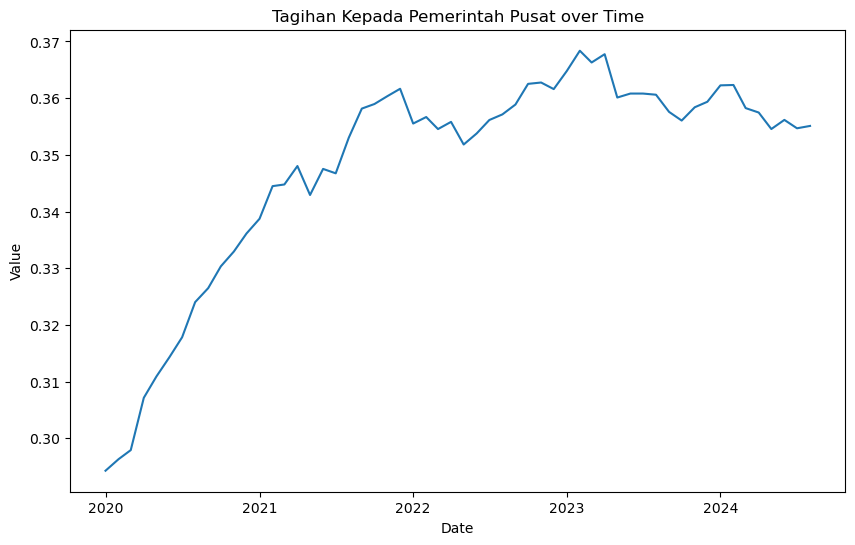

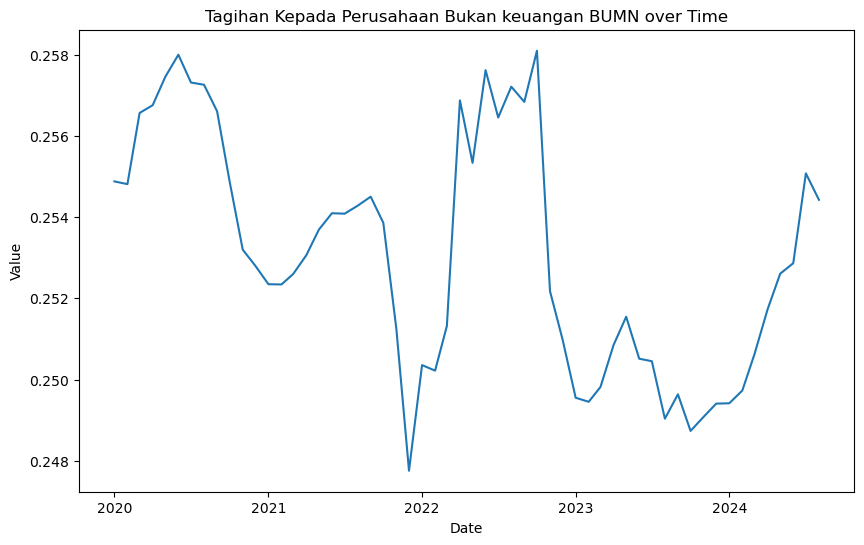

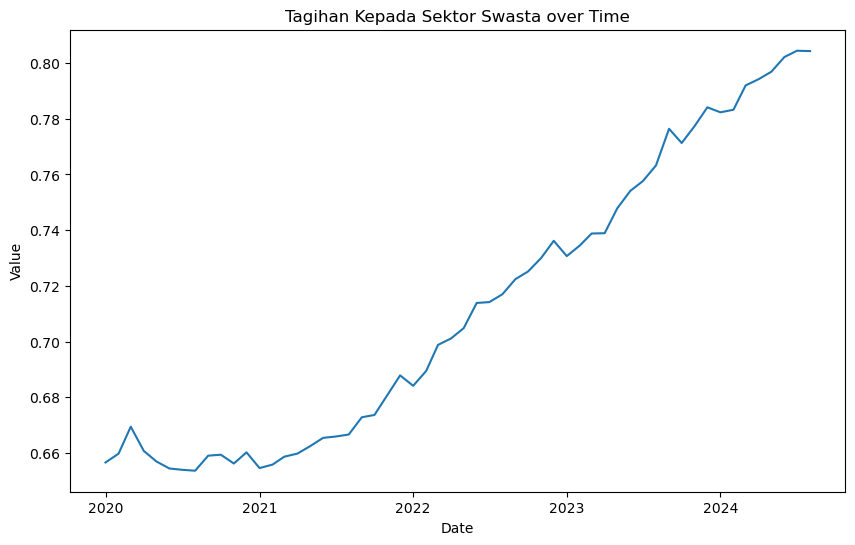

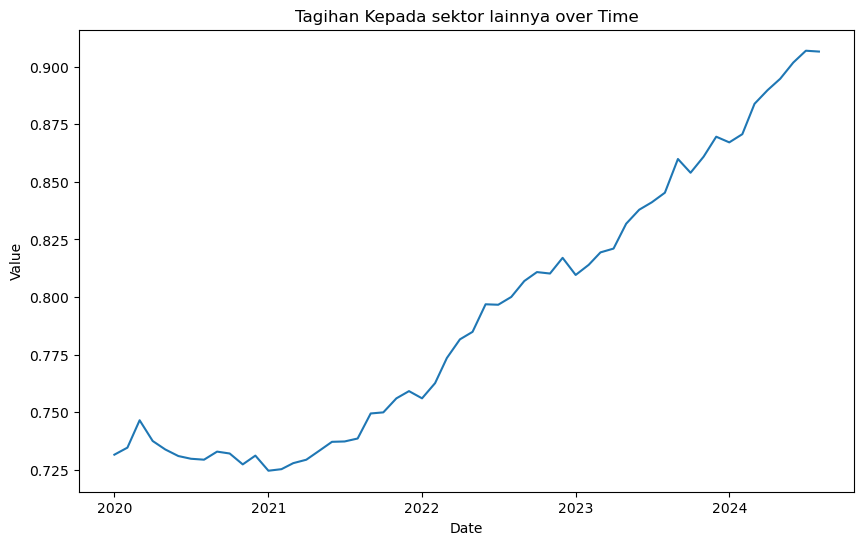

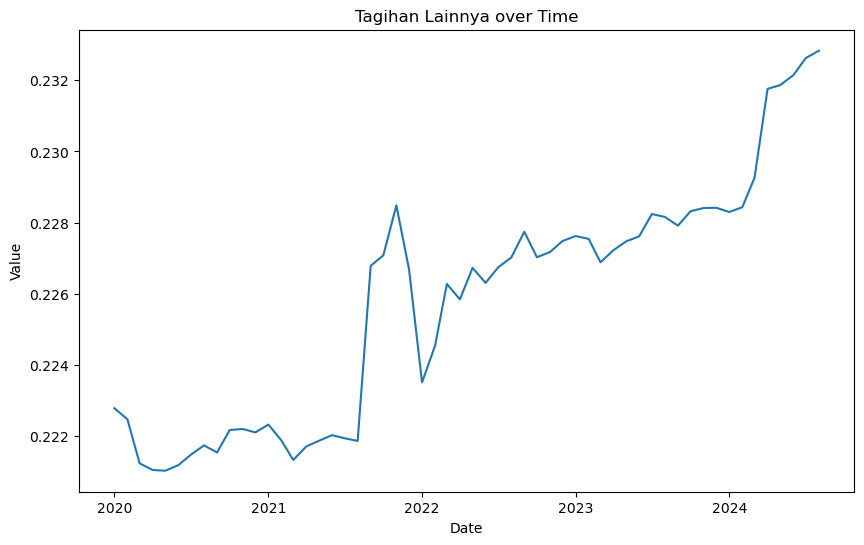

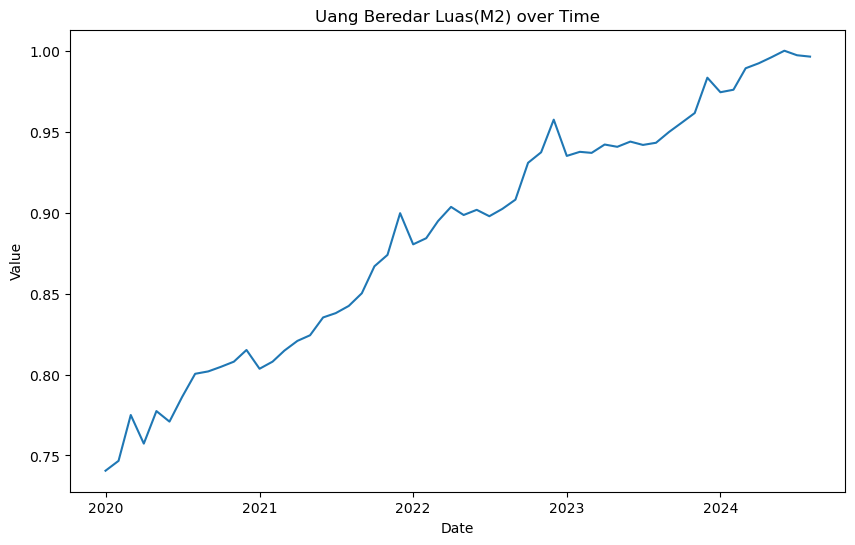

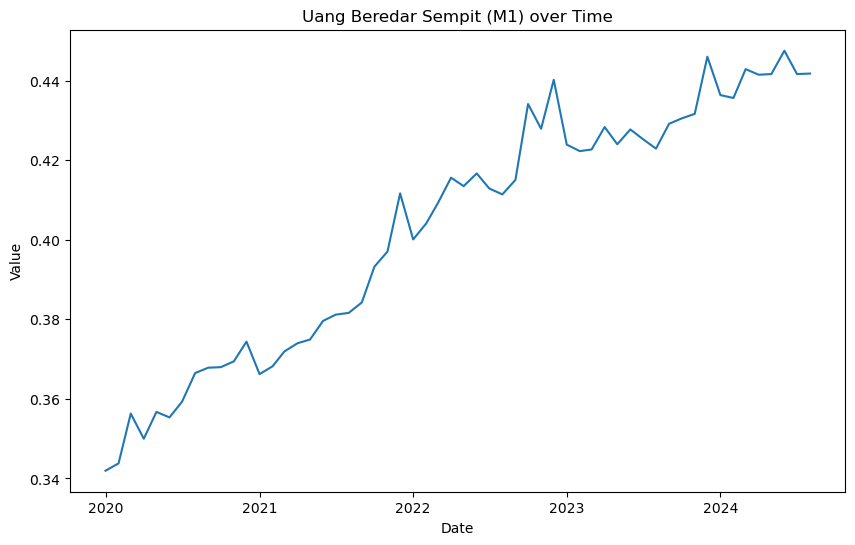

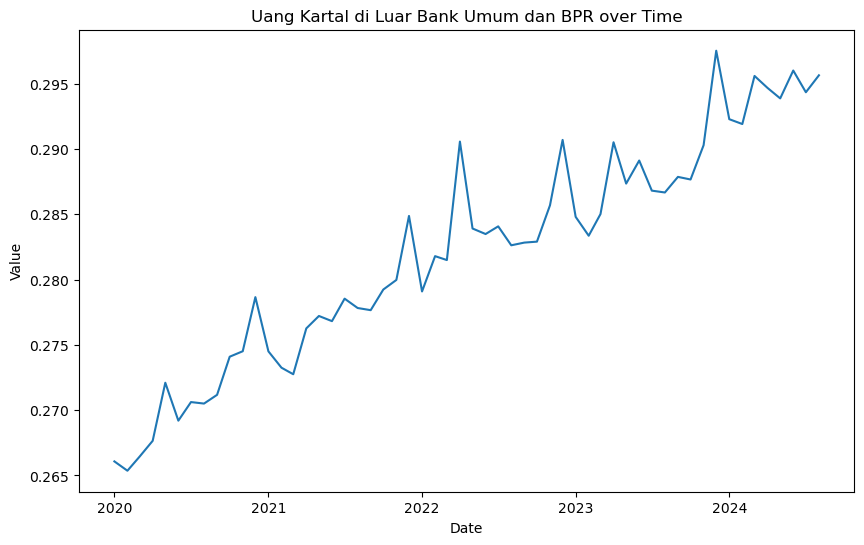

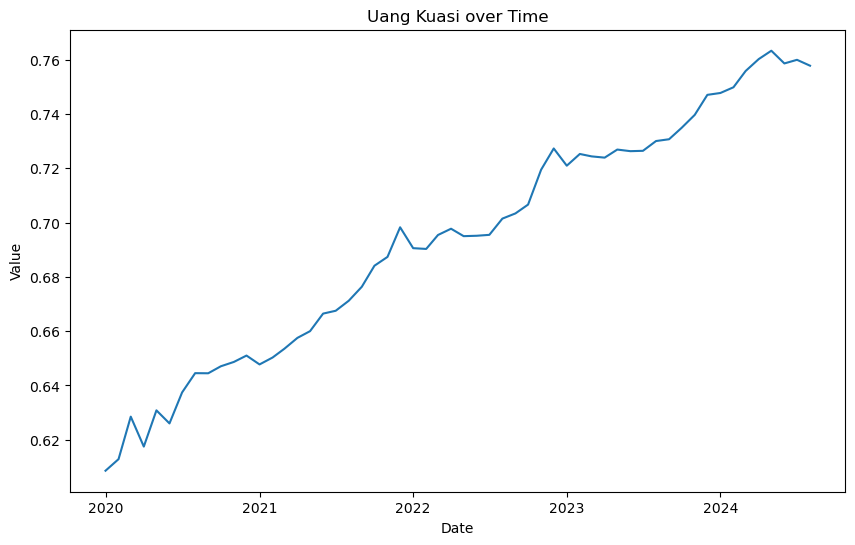

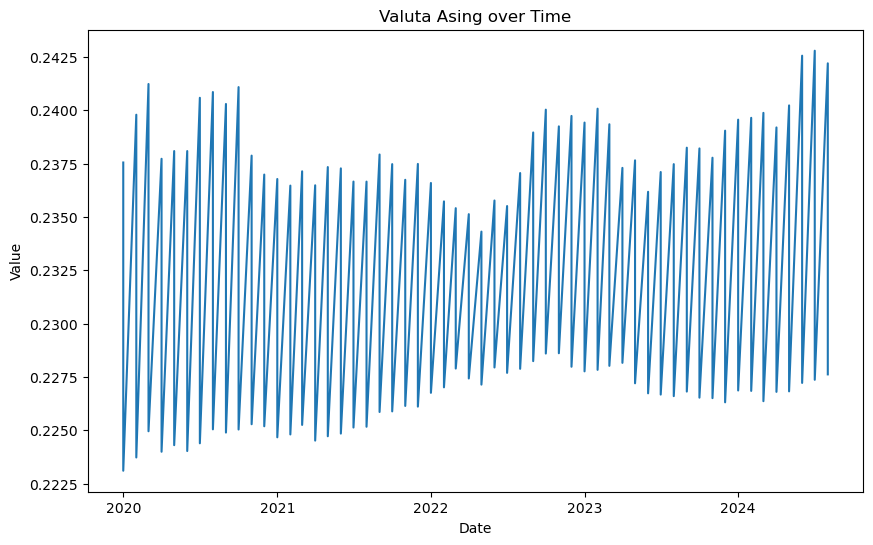

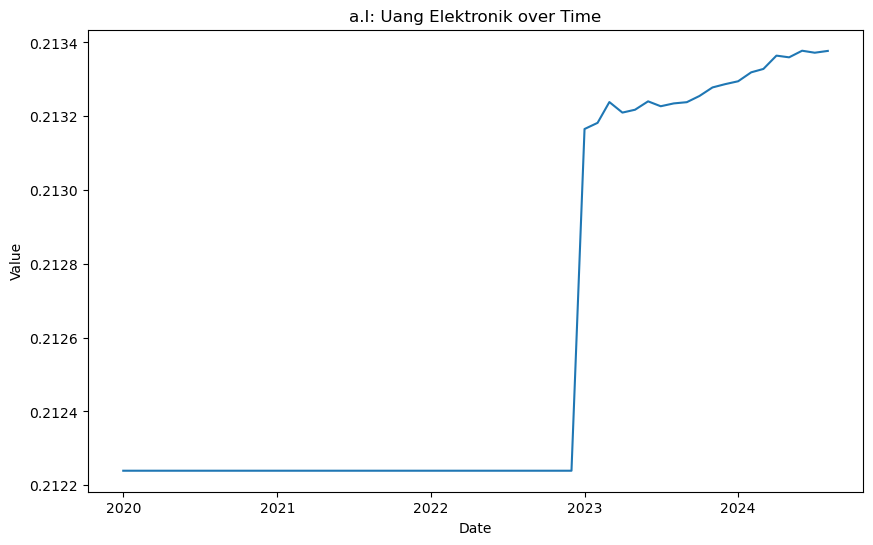

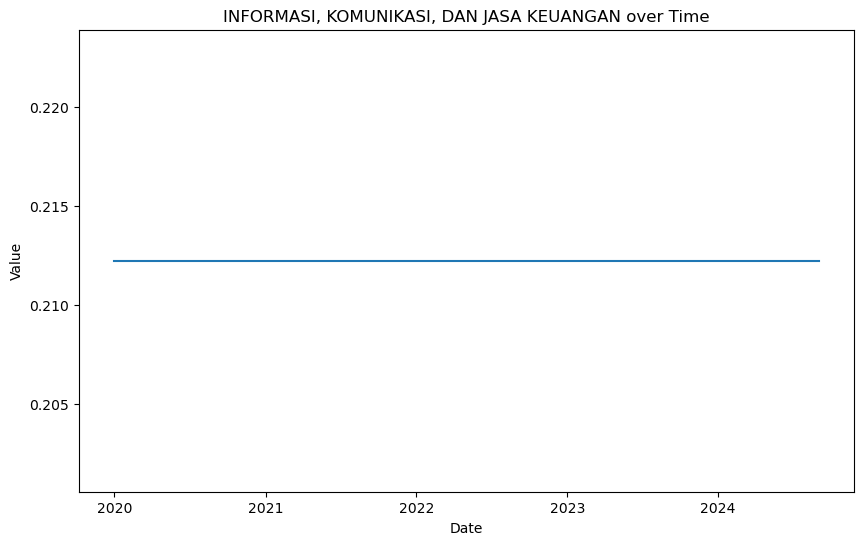

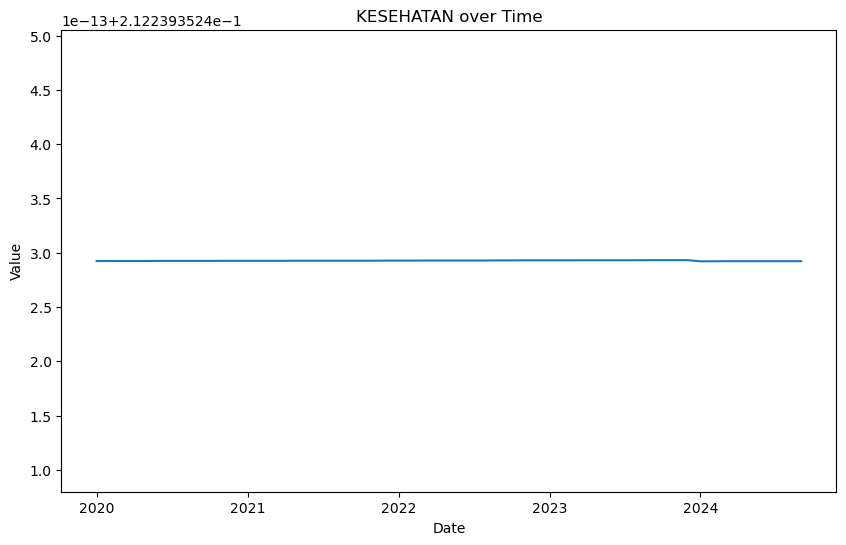

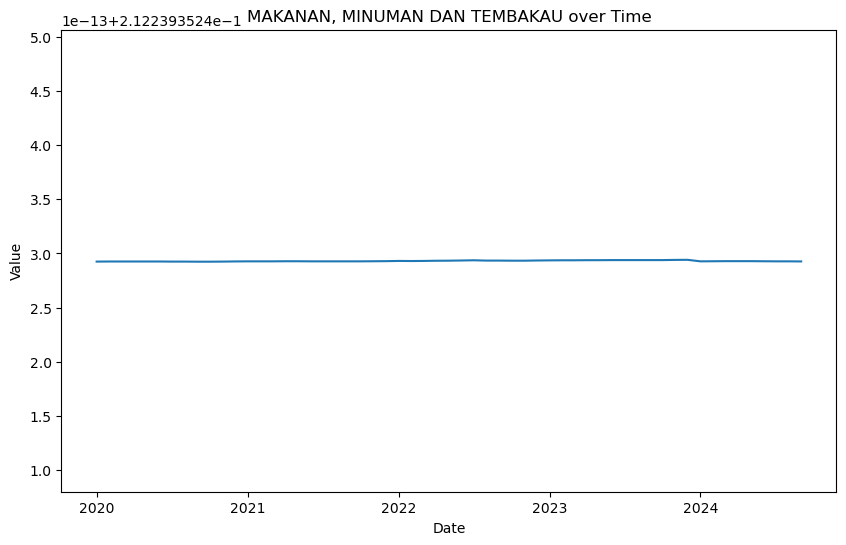

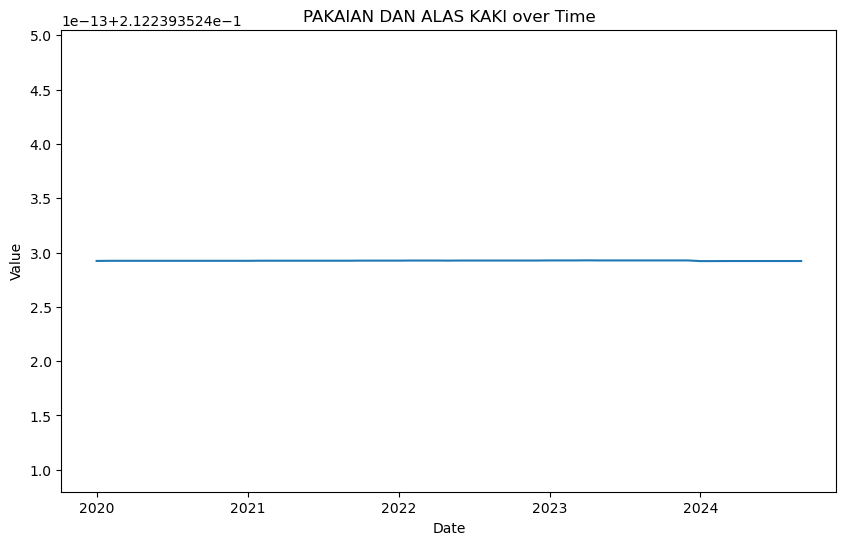

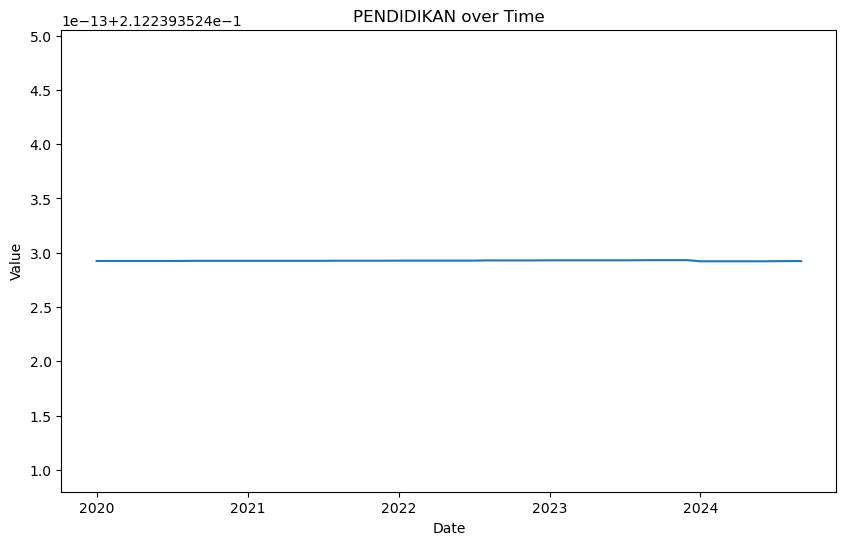

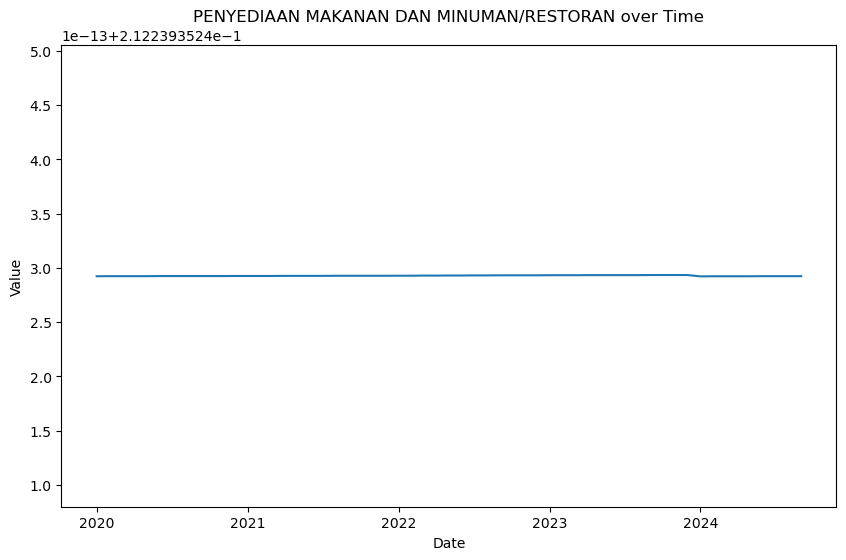

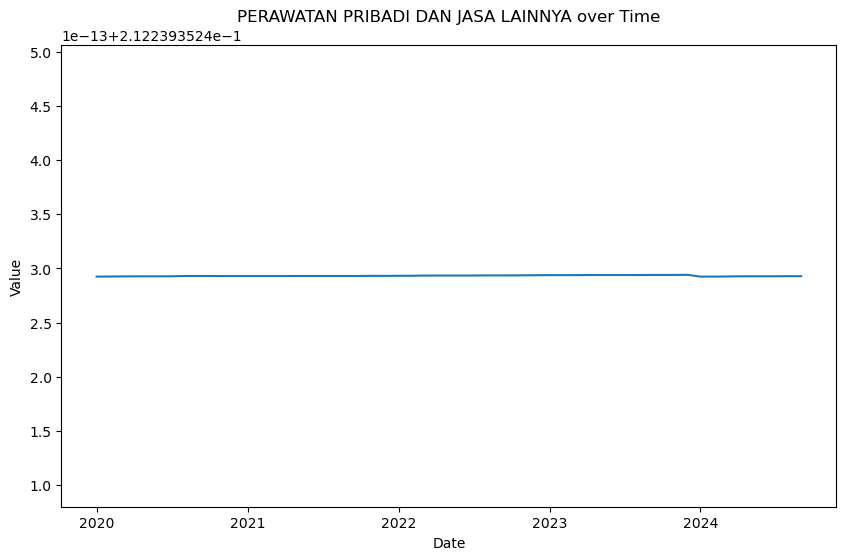

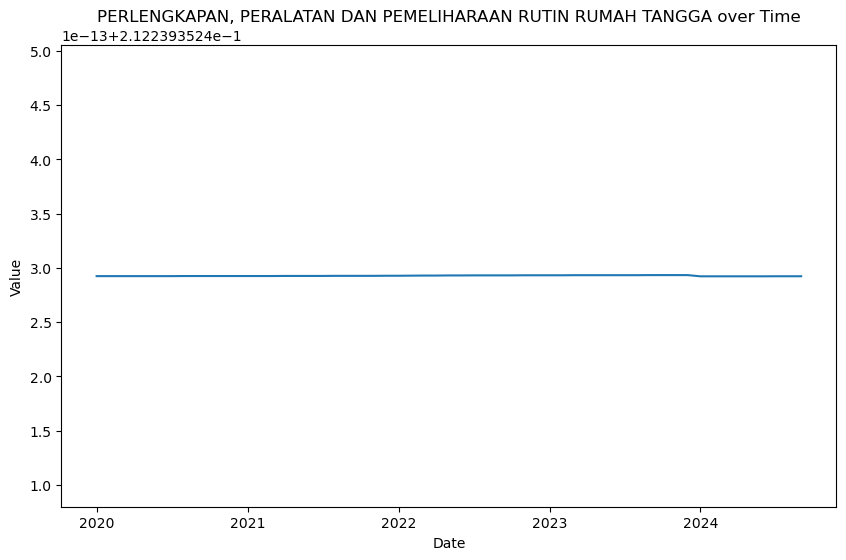

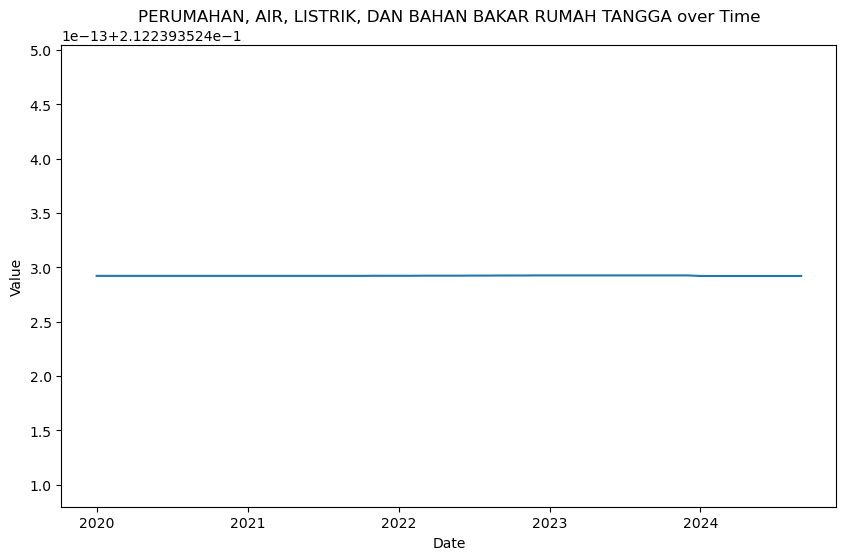

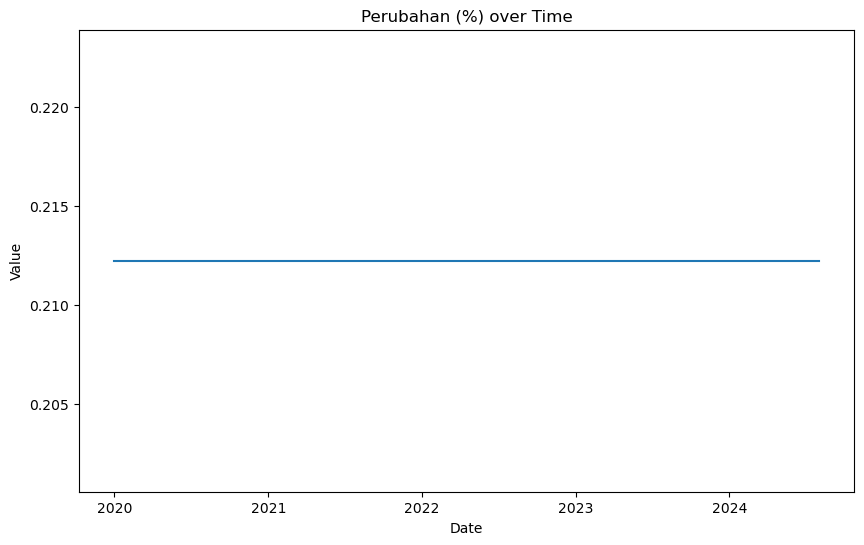

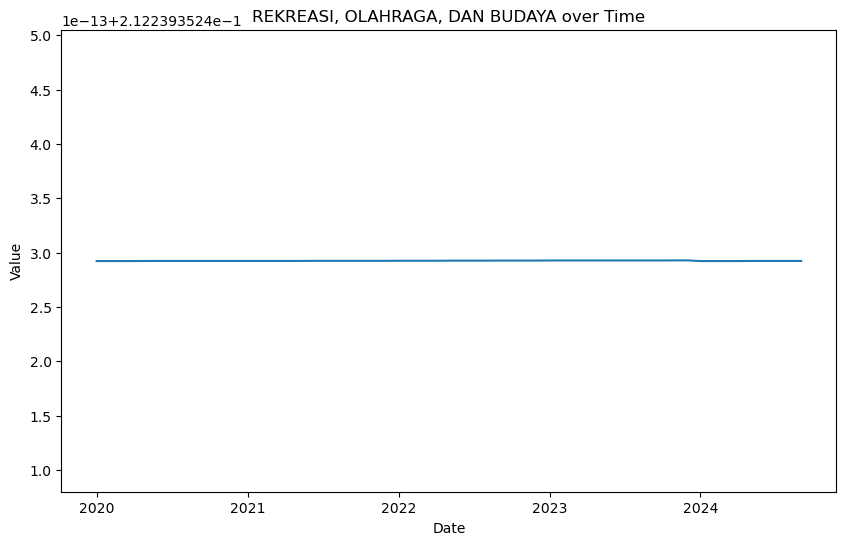

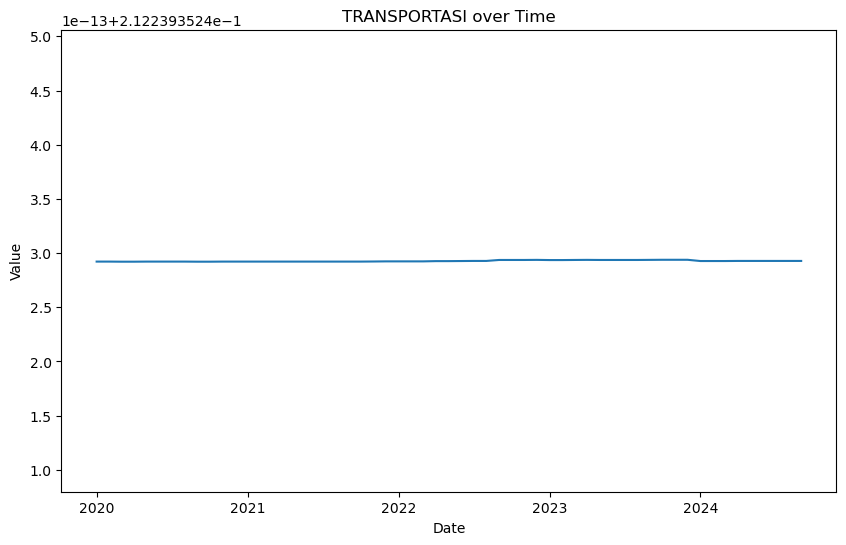

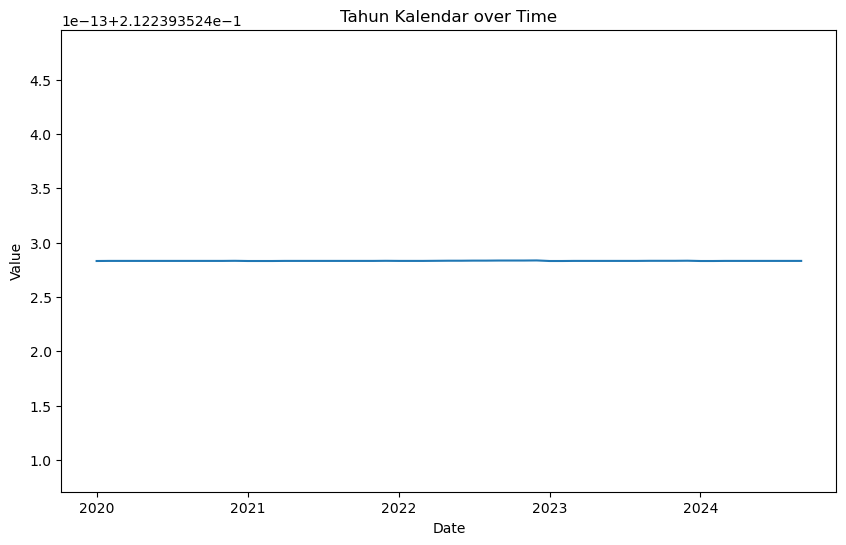

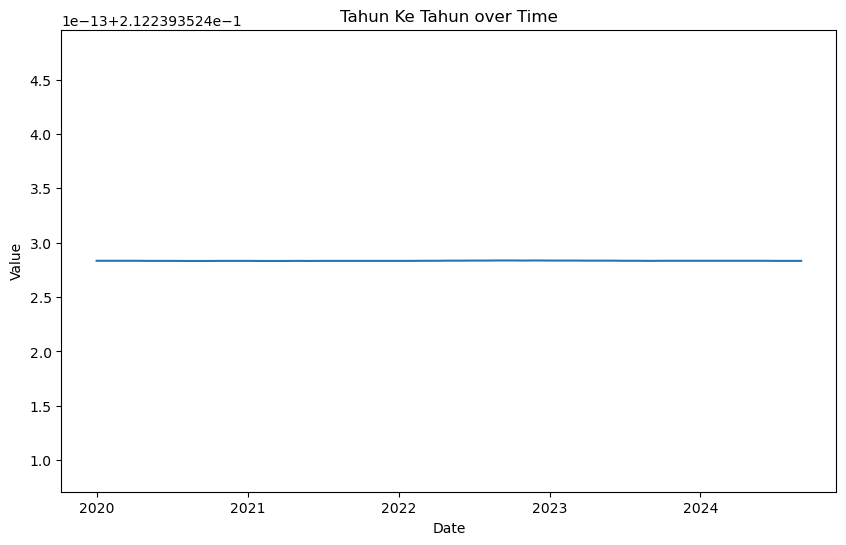

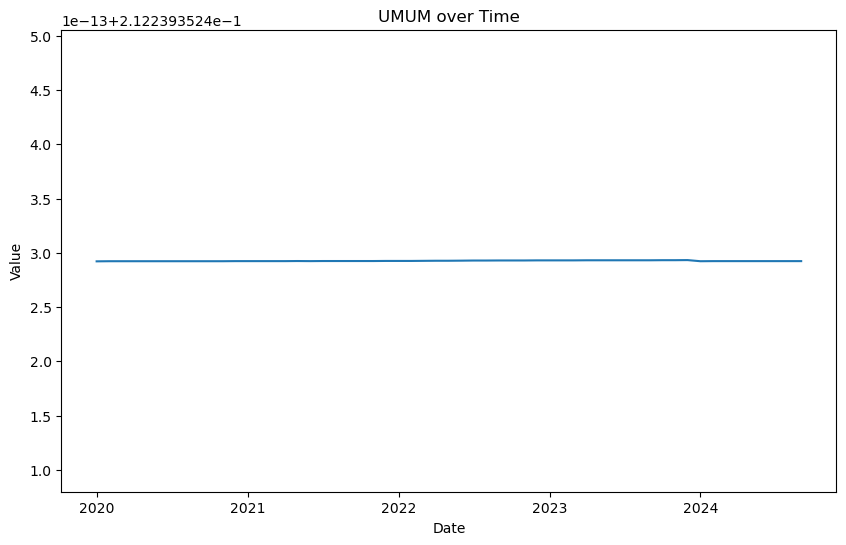

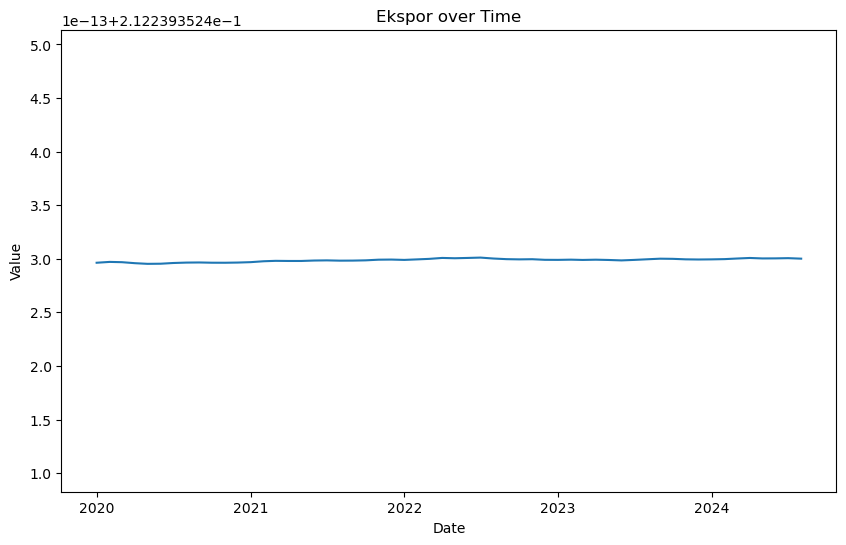

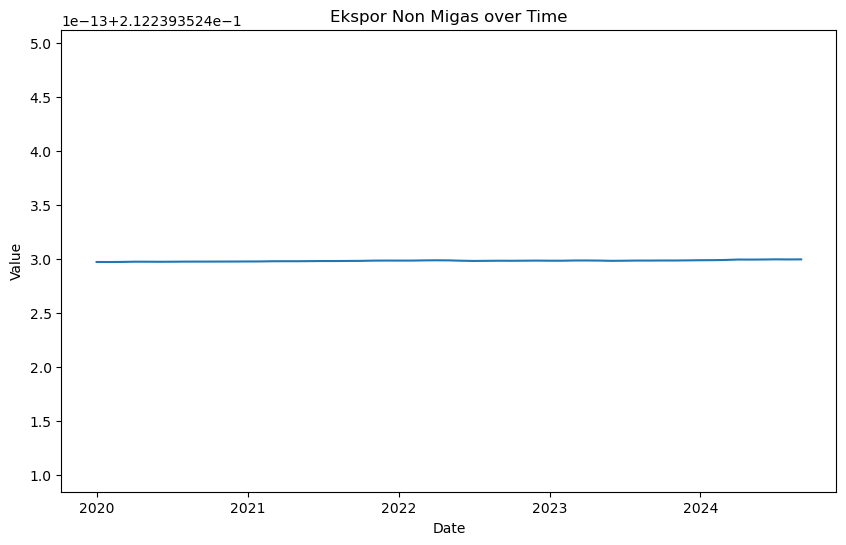

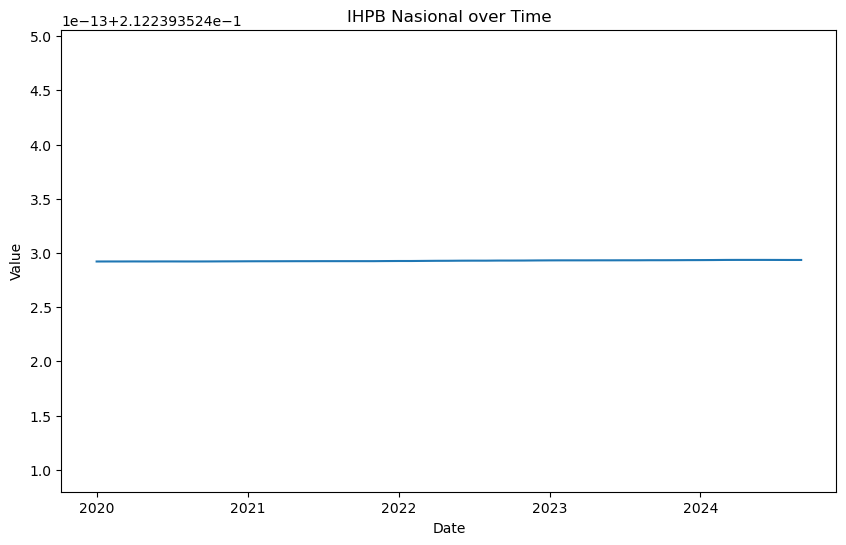

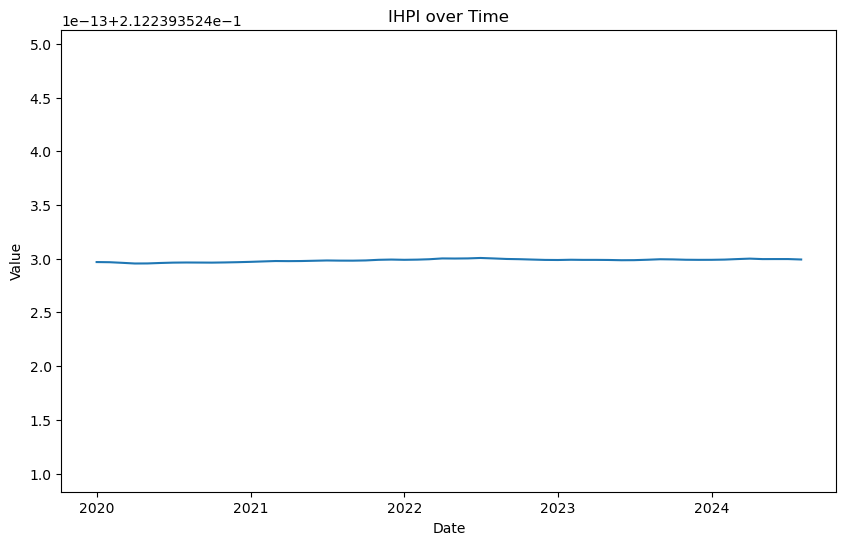

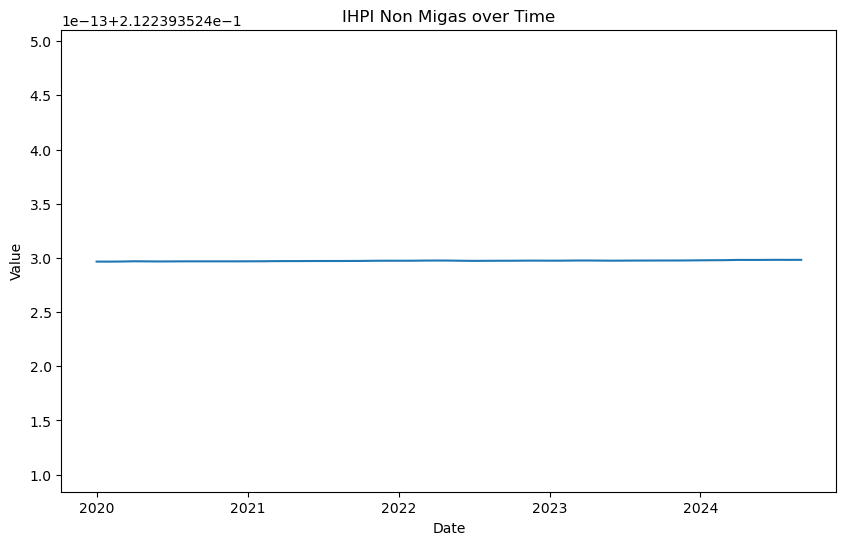

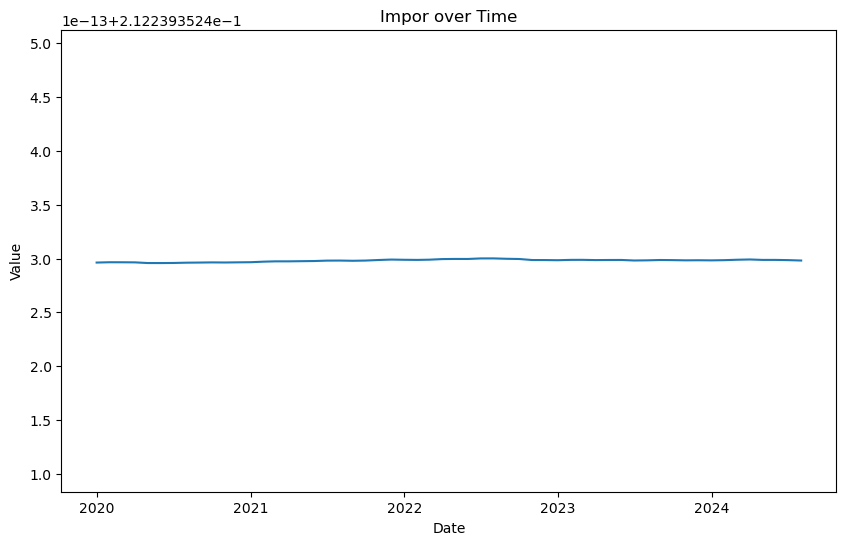

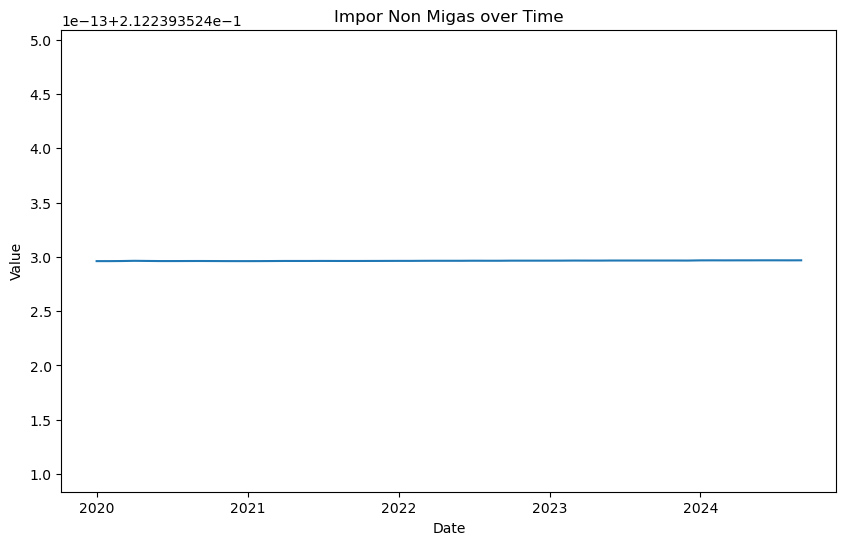

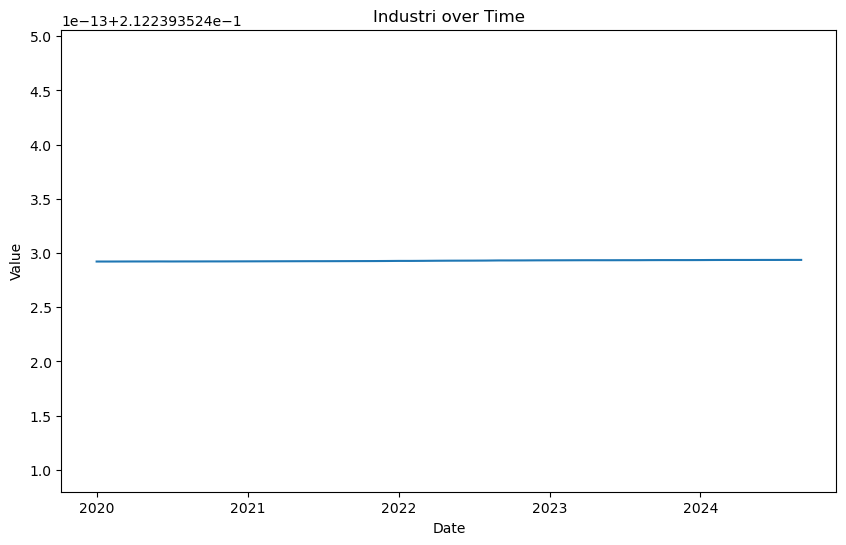

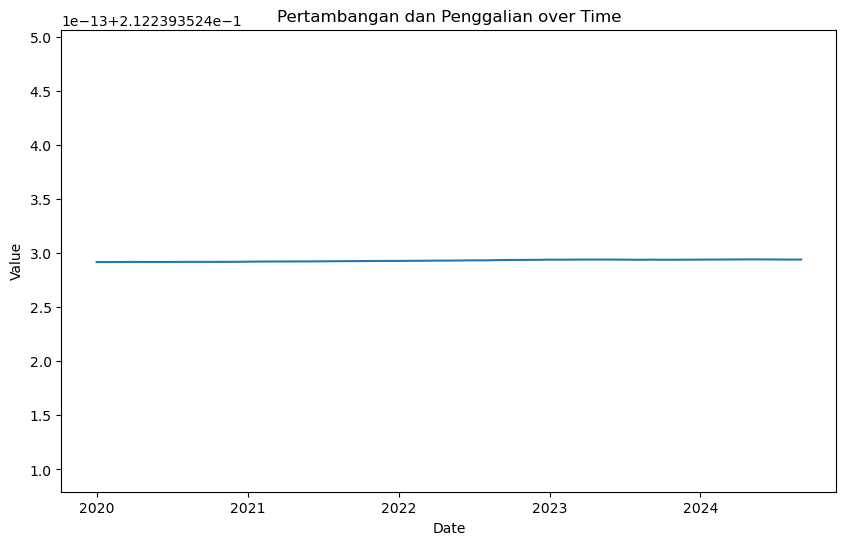

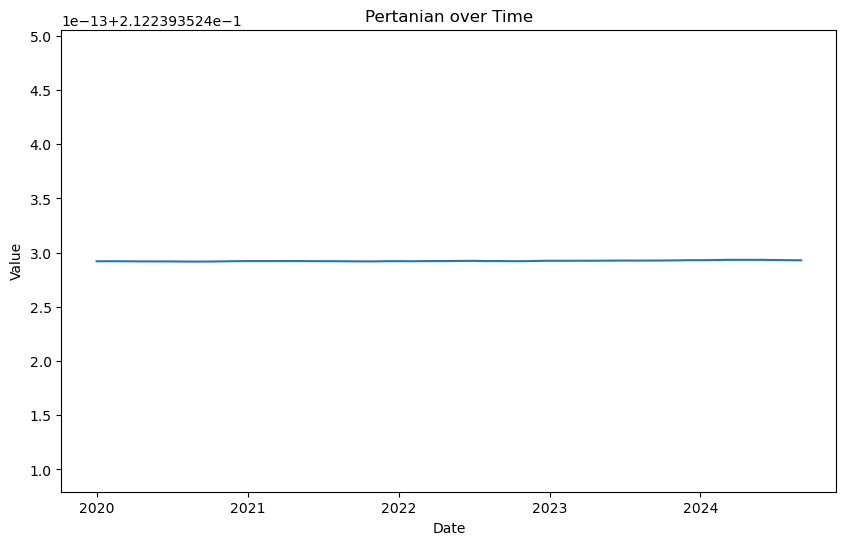

In [13]:
import matplotlib.pyplot as plt

indicators = combined_data['Description'].unique()
for indicator in indicators:
    data = combined_data[combined_data['Description'] == indicator]
    plt.figure(figsize=(10, 6))
    plt.plot(data['Date'], data['Value'])
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.title(f'{indicator} over Time')
    plt.show()

In [14]:
# # Example of creating a new feature
# combined_data['Value_lag1'] = combined_data.groupby('Description')['Value'].shift(1)
# combined_data.dropna(inplace=True)
# combined_data.head()

In [15]:
# from sklearn.preprocessing import LabelEncoder

# label_encoder = LabelEncoder()
# combined_data['Description'] = label_encoder.fit_transform(combined_data['Description'])
# combined_data

In [22]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Prepare data for LSTM
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    dataset = tf.data.Dataset.from_tensor_slices(series)
    dataset = dataset.window(window_size + 1, shift=1, drop_remainder=True)
    dataset = dataset.flat_map(lambda window: window.batch(window_size + 1))
    dataset = dataset.map(lambda window: (window[:-1], window[-1]))
    dataset = dataset.shuffle(shuffle_buffer)
    return dataset.batch(batch_size).prefetch(1)

window_size = 30
batch_size = 32
shuffle_buffer_size = 1000

# Train a model for each indicator
models = {}
for indicator in combined_data['Description'].unique():
    data = combined_data[combined_data['Description'] == indicator]
    series = data['Value'].values
    dataset = windowed_dataset(series, window_size, batch_size, shuffle_buffer_size)
    
    model = Sequential([
        LSTM(64, return_sequences=True, input_shape=[None, 1]),
        LSTM(64),
        Dense(1)
    ])
    
    model.compile(loss='mse', optimizer='adam')
    model.fit(dataset, epochs=10)
    models[indicator] = model

Epoch 1/10


c:\Users\khosy\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 0.5494
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.4166
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.3111
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.2129
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.1214
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0443

c:\Users\khosy\anaconda3\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0443
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0016
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0258
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0820
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0839
Epoch 1/10


KeyboardInterrupt: 

In [17]:
# Evaluate the model for each indicator
for indicator, model in models.items():
    data = combined_data[combined_data['Description'] == indicator]
    series = data['Value'].values
    dataset = windowed_dataset(series, window_size, batch_size, shuffle_buffer_size)
    loss = model.evaluate(dataset)
    print(f'Model Loss for {indicator}: {loss}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step - loss: 0.0853
Model Loss for Aktiva Dalam Negeri Bersih: 0.08532296121120453
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step - loss: 0.0120
Model Loss for Aktiva Luar negeri Bersih: 0.011988545767962933
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step - loss: 0.0787
Model Loss for Faktor-faktor Yang Mempengaruhi Uang beredar: 0.07872778922319412
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step - loss: 0.0201
Model Loss for Giro Rupiah: 0.020088335499167442
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step - loss: 0.0061
Model Loss for Giro Valas: 0.006051736418157816
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step - loss: 0.0103
Model Loss for Kewajiban Kepada Bukan Penduduk: 0.010334309190511703
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 268ms/step - loss: 6.1007e-04
Model Loss for Kewajiban Kepada Pemerintah Pusat: 0.0006100707105360925
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step - loss: 0.0024
Model Loss for Kewajiban Lainnya kepada Lembaga Keuangan: 0.0024027121253311634
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step 

In [18]:
def make_predictions(models, data, window_size):
    predictions = {}
    for indicator, model in models.items():
        indicator_data = data[data['Description'] == indicator]
        series = indicator_data['Value'].values
        # Prepare the data for prediction
        input_data = np.array([series[-window_size:]])
        input_data = input_data.reshape((input_data.shape[0], input_data.shape[1], 1))
        prediction = model.predict(input_data)
        predictions[indicator] = prediction[0][0]
    return predictions

# Example usage
predictions = make_predictions(models, combined_data, window_size)
print(predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 

In [21]:
for indicator, model in models.items():
    model.save(f"model_{indicator}.h5")

In [19]:
def define_market_condition(predictions):
    conditions = {}
    for indicator, prediction in predictions.items():
        if prediction > 0.05:  # Example threshold for bullish
            conditions[indicator] = 'bullish'
        elif prediction < -0.05:  # Example threshold for bearish
            conditions[indicator] = 'bearish'
        else:
            conditions[indicator] = 'neutral'
    return conditions

# Example usage
market_conditions = define_market_condition(predictions)
print(market_conditions)

{'Aktiva Dalam Negeri Bersih': 'bullish', 'Aktiva Luar negeri Bersih': 'bullish', 'Faktor-faktor Yang Mempengaruhi Uang beredar': 'bullish', 'Giro Rupiah': 'bullish', 'Giro Valas': 'bullish', 'Kewajiban Kepada Bukan Penduduk': 'bullish', 'Kewajiban Kepada Pemerintah Pusat': 'bullish', 'Kewajiban Lainnya kepada Lembaga Keuangan': 'bullish', 'Pinjaman yang Diberikan': 'bullish', 'Rupiah': 'bullish', 'Saham dan Modal lainnya': 'neutral', 'Simpanan Berjangka (Rupiah dan Valas)': 'bullish', 'Simpanan dan Surat Berharga yang tidak termasuk Uang Beredar': 'bullish', 'Surat Berharga Selain Saham': 'bullish', 'Tabungan Lainnya (Rupiah dan Valas)': 'bullish', 'Tagihan Bersih kepada Pemerintah Pusat': 'bullish', 'Tagihan Kepada Bukan Penduduk': 'bullish', 'Tagihan Kepada Lembaga keuangan Lainnya': 'bullish', 'Tagihan Kepada Pemerintah Daerah': 'bullish', 'Tagihan Kepada Pemerintah Pusat': 'bullish', 'Tagihan Kepada Perusahaan Bukan keuangan BUMN': 'bullish', 'Tagihan Kepada Sektor Swasta': 'bulli